In [2]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

#Code goes after this line by adding cells

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
starwar = pd.read_csv(r'C:/Users/new/Desktop/Practice data science/assignment1/StarWars.csv', encoding='ISO-8859-1')

In [5]:
starwar.dtypes

RespondentID                                                                                                                                     float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                      object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                             object
Which of the following Star Wars films have you seen? Please select all that apply.                                                               object
Unnamed: 4                                                                                                                                        object
Unnamed: 5                                                                                                                                        object
Unnamed: 6                                                                        

In [6]:
starwar.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
print(len(starwar.columns))
starwar.columns

38


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [8]:
starwar.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RespondentID,1186.0,3.290128e+09,1.055639e+06,3.288373e+09,3.289451e+09,3.290147e+09,3.290814e+09,3.292880e+09


In [9]:
#check for null values
starwar["RespondentID"].isnull().sum()

1

In [10]:
#Replace the null value
starwar = starwar[pd.notnull(starwar["RespondentID"])]

In [11]:
#check the null again
starwar["RespondentID"].isnull().sum()

0

In [12]:
starwar['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes     935
No      250
Yes       1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [13]:
starwar['Have you seen any of the 6 films in the Star Wars franchise?'].isnull().sum()

0

In [14]:
starwar['Have you seen any of the 6 films in the Star Wars franchise?']=starwar['Have you seen any of the 6 films in the Star Wars franchise?'].str.strip()
starwar['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [15]:
starwar['Do you consider yourself to be a fan of the Star Wars film franchise?'].isnull().sum()

350

In [16]:
starwar = starwar[pd.notnull(starwar["Do you consider yourself to be a fan of the Star Wars film franchise?"])]

In [17]:
starwar['Do you consider yourself to be a fan of the Star Wars film franchise?'].isnull().sum()

0

In [18]:
starwar['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes     551
No      283
Noo       1
Yess      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [19]:
starwar['Do you consider yourself to be a fan of the Star Wars film franchise?'].replace('Noo','No').replace('Yess','Yes').value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [20]:
starwar['Which character shot first?'].isnull().sum()

8

In [21]:
starwar = starwar[pd.notnull(starwar["Which character shot first?"])]

In [22]:
starwar['Which character shot first?'].isnull().sum()

0

In [23]:
starwar['Which character shot first?'].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [24]:
starwar['Are you familiar with the Expanded Universe?'].isnull().sum()

0

In [25]:
starwar['Are you familiar with the Expanded Universe?'].value_counts()

No     615
Yes    213
Name: Are you familiar with the Expanded Universe?, dtype: int64

In [26]:
starwar['Gender'].isnull().sum()

8

In [27]:
starwar = starwar[pd.notnull(starwar["Gender"])]

In [28]:
starwar['Gender'].isnull().sum()

0

In [29]:
starwar['Gender'].value_counts()

Male      423
Female    394
female      2
F           1
Name: Gender, dtype: int64

In [30]:
starwar['Gender']=starwar['Gender'].str.upper()

In [31]:
starwar['Gender'].replace('F','FEMALE').value_counts()

MALE      423
FEMALE    397
Name: Gender, dtype: int64

In [32]:
starwar['Age'].isnull().sum()

0

In [33]:
starwar['Age'].value_counts()

45-60    240
30-44    207
> 60     193
18-29    179
500        1
Name: Age, dtype: int64

In [34]:
starwar['Age'].replace('500','NaN').value_counts()

45-60    240
30-44    207
> 60     193
18-29    179
NaN        1
Name: Age, dtype: int64

In [35]:
starwar['Household Income'].isnull().sum()

145

In [36]:
starwar = starwar[pd.notnull(starwar["Household Income"])]

In [37]:
starwar['Household Income'].isnull().sum()

0

In [38]:
starwar["Household Income"].value_counts()

$50,000 - $99,999      238
$25,000 - $49,999      147
$100,000 - $149,999    115
$0 - $24,999            98
$150,000+               77
Name: Household Income, dtype: int64

In [39]:
starwar['Education'].isnull().sum()

1

In [40]:
starwar = starwar[pd.notnull(starwar["Education"])]

In [41]:
starwar['Education'].isnull().sum()

0

In [42]:
starwar["Education"].value_counts()

Bachelor degree                     223
Some college or Associate degree    210
Graduate degree                     186
High school degree                   54
Less than high school degree          1
Name: Education, dtype: int64

In [43]:
starwar['Location (Census Region)'].isnull().sum()

2

In [44]:
starwar = starwar[pd.notnull(starwar["Location (Census Region)"])]

In [45]:
starwar["Location (Census Region)"].value_counts()

Pacific               116
East North Central    109
South Atlantic        108
Middle Atlantic        72
West North Central     68
West South Central     63
Mountain               59
New England            50
East South Central     27
Name: Location (Census Region), dtype: int64

In [46]:
starwar["Do you consider yourself to be a fan of the Star Trek franchise?"].value_counts()

Yes    337
No     333
yes      1
Noo      1
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [47]:
starwar["Do you consider yourself to be a fan of the Expanded Universe?"].value_counts()

No      92
Yes     83
Yess     1
Name: Do you consider yourself to be a fan of the Expanded Universe?, dtype: int64

In [48]:
starwar["Do you consider yourself to be a fan of the Expanded Universe?"].isnull().sum()

496

In [49]:
starwar["Do you consider yourself to be a fan of the Expanded Universe?"].replace('Yess','Yes').value_counts()

No     92
Yes    84
Name: Do you consider yourself to be a fan of the Expanded Universe?, dtype: int64

In [50]:
# Task 2: Data Exploration
# 1. Explore the survey question: \textit{Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.	(Star Wars: Episode I  The Phantom Menace; Star Wars: Episode II  Attack of the Clones; Star Wars: Episode III  Revenge of the Sith;	Star Wars: Episode IV  A New Hope; Star Wars: Episode V The Empire Strikes Back; Star Wars: Episode VI Return of the Jedi)}, then analysis how people rate Star Wars Movies. 


#Code goes after this line by adding cells

In [51]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in starwar.columns[3:9]:
    starwar[col] = starwar[col].map(movie_mapping)
starwar =starwar.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"})
starwar = starwar.rename(columns={"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"})

In [52]:
starwar[starwar.columns[9:15]]=starwar[starwar.columns[9:15]].astype(float)

In [53]:
starwar.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

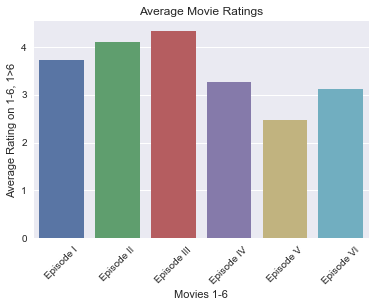

In [54]:
%matplotlib inline
mean=starwar[starwar.columns[9:15]].mean()
movies = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"]
sns.barplot(movies,mean)
plt.title("Average Movie Ratings")
plt.xticks(rotation=45)
#plt.bar(range(1,7),me)
plt.xlabel("Movies 1-6")
plt.ylabel("Average Rating on 1-6, 1>6")
plt.show()

In [55]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line by adding cells

In [56]:
# Task 2: Data Exploration
# 3. Explore whether there are relationship between people's demographics (Gender, Age, Household Income, Education, Location) and their attitude to Start War characters. 

#Code goes after this line by adding cells

### Analyzing the Ranking and Attendance of Each Installment of Movies by Gender

In [64]:
starwar.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

In [67]:
males = starwar[starwar["Gender"] == "MALE"]
females = starwar[starwar["Gender"] == "FEMALE"]

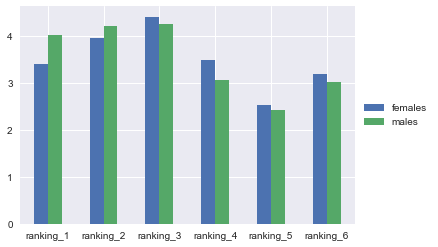

In [68]:
rank_mean_f = females[females.columns[9:15]].mean()
rank_mean_m = males[males.columns[9:15]].mean()
df = pd.DataFrame({'females': rank_mean_f,'males': rank_mean_m})
ax = df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

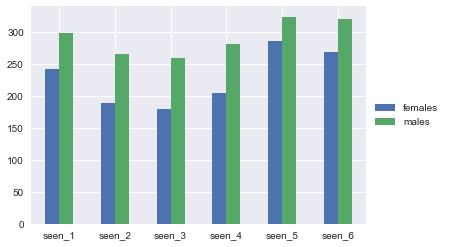

In [69]:
seen_f = females[females.columns[3:9]].sum()
seen_m = males[males.columns[3:9]].sum()
df2 = pd.DataFrame({'females': seen_f,'males': seen_m})
ax2 = df2.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Analyzing the Ranking and Attendance of Each Installment of Movies by Education level

In [72]:
starwar['Education'].value_counts()

Bachelor degree                     222
Some college or Associate degree    210
Graduate degree                     185
High school degree                   54
Less than high school degree          1
Name: Education, dtype: int64

In [77]:
def rank_df(srs):
    count = srs.value_counts()
    z = count.index
    edu_rank = {}
    i=0
    for edu in z:
        df1 = starwar[srs == str(edu)]
        edu_rank[edu] = df1[df1.columns[9:15]].mean()
        i+=1
    df_edur = pd.DataFrame(edu_rank)
    return df_edur

def seen_df(srs):
    count = srs.value_counts()
    z = count.index
    edu_seen = {}
    i=0
    for edu in z:
        df1 = starwar[srs == str(edu)]
        edu_seen[edu] = df1[df1.columns[3:9]].sum()
        i+=1
    df_edus = pd.DataFrame(edu_seen)
    return df_edus

In [82]:
df_edur = rank_df(starwar['Education'])
df_edus = seen_df(starwar['Education'])

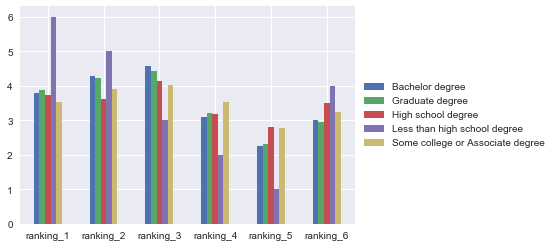

In [83]:
axedur = df_edur.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

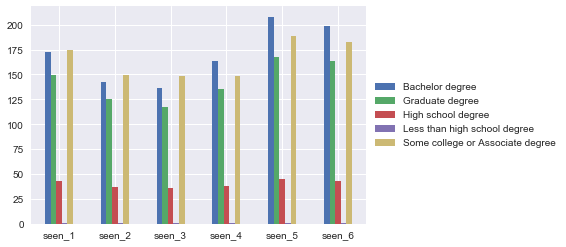

In [84]:
axedus = df_edus.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Analyzing the Ranking and Attendance of Each Installment of Movies by location

In [85]:
df_locr = rank_df(starwar['Location (Census Region)'])
df_locs = seen_df(starwar['Location (Census Region)'])

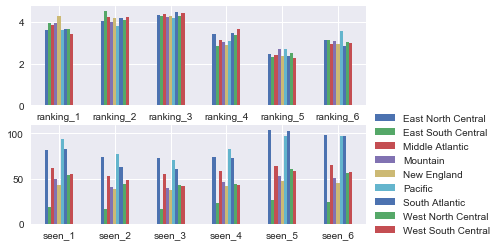

In [86]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axlocr = df_locr.plot.bar(rot=0,ax=axes[0])
axlocr.legend().set_visible(False)
axlocs = df_locs.plot.bar(rot=0,ax=axes[1])

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

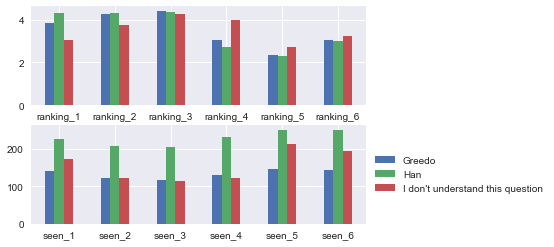

In [88]:
starwar['Which character shot first?'].value_counts()
df_sr = rank_df(starwar['Which character shot first?'])
df_ss = seen_df(starwar['Which character shot first?'])
fig, axes = plt.subplots(nrows=2, ncols=1)
axlocr = df_sr.plot.bar(rot=0,ax=axes[0])
axlocr.legend().set_visible(False)
axlocs = df_ss.plot.bar(rot=0,ax=axes[1])

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [104]:
boolfan = starwar['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True
boolhan = starwar['Which character shot first?'] == 'Han'
hanf = starwar[boolhan]['Age'].value_counts()
hanf

45-60    80
30-44    77
18-29    69
> 60     35
Name: Age, dtype: int64

In [105]:
boolg = starwar['Which character shot first?'] == 'Greedo'
greedf = starwar[boolg]['Age'].value_counts()

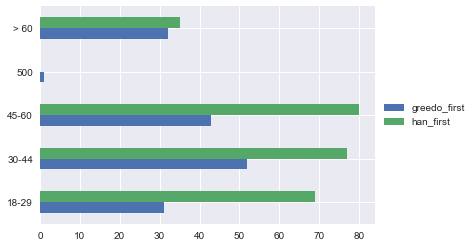

In [106]:
dfhg = pd.DataFrame({'han_first': hanf, 'greedo_first': greedf})
dfhg.plot.barh()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

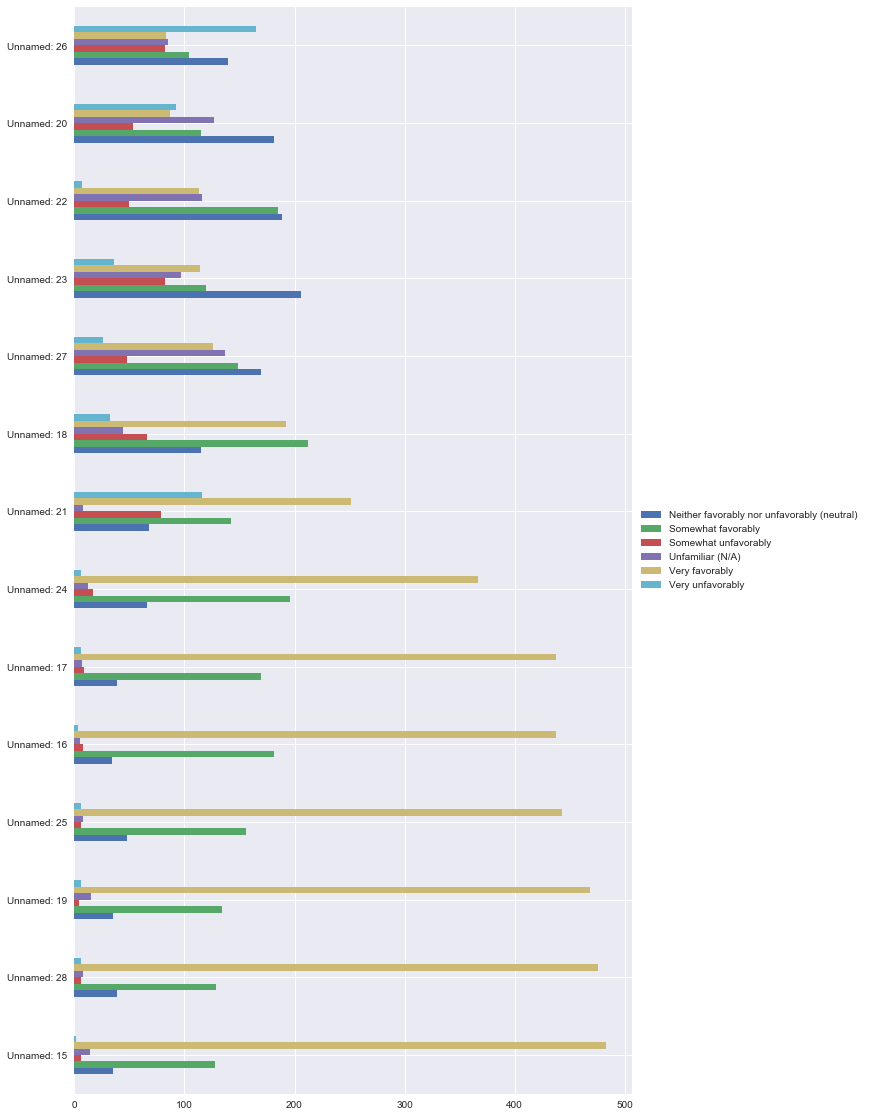

In [107]:
char={}
starwar = starwar.rename(columns={starwar.columns[15]:'Unnamed: 15'})
for srs in starwar.columns[15:29]:
    char[srs] = starwar[srs].value_counts()

df_char = pd.DataFrame(char)
df_char = df_char.T
df_char = df_char.sort_values(by=['Very favorably'], ascending = False)
df_char
df_char.plot.barh(figsize=(10,20))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [108]:
cols_char = {'Unnamed: 15': 'Luke Skywalker'
,'Unnamed: 16': 'Yoda'
,'Unnamed: 17': 'R2-D2'
,'Unnamed: 18': 'Darth Vader'
,'Unnamed: 19': 'Princess Leia Organa'
,'Unnamed: 20': 'Jar Jar Binks'
,'Unnamed: 21': 'Anakin Skywalker'
,'Unnamed: 22': 'Padme Amidala'
,'Unnamed: 23': 'Boba Fett'
,'Unnamed: 24': 'C-3P0'
,'Unnamed: 25': 'Obi Wan Kenobi'
,'Unnamed: 26': 'Emperor Palpatine'
,'Unnamed: 27': 'Lando Calrissian'
,'Unnamed: 28': 'Han Solo'}

In [110]:
starwar = starwar.rename(columns = cols_char)

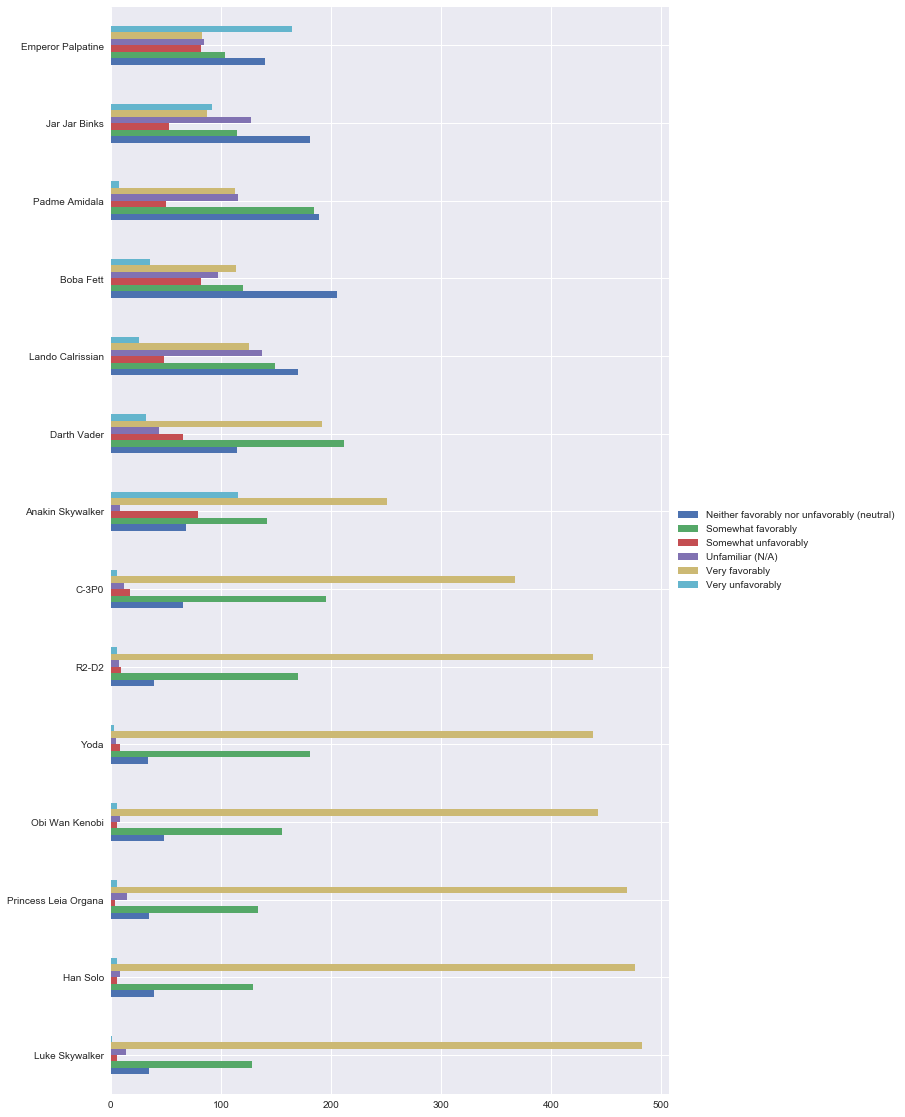

In [111]:
df_char = df_char.T
df_char = df_char.rename(columns = cols_char)
df_char = df_char.T
df_char = df_char.sort_values(by=['Very favorably'], ascending = False)

df_char.plot.barh(figsize=(10,20))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

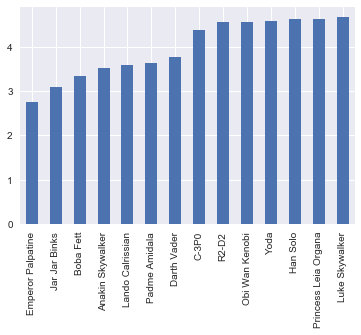

In [112]:
favor = {'Very favorably':5,
'Somewhat favorably':4,
'Neither favorably nor unfavorably (neutral)':3,
'Unfamiliar (N/A)':np.nan,
'Somewhat unfavorably':2,
'Very unfavorably':1}
 
for srs in starwar.columns[15:29]:
    starwar[srs] = starwar[srs].map(favor)
char_rank_mean = starwar[starwar.columns[15:29]].mean()
char_rank_mean = char_rank_mean.sort_values(axis=0, ascending=True, inplace=False)
char_rank_mean.plot.bar()

In [113]:
def char_fave(df):
    df = df.rename(columns = {df.columns[15]:'Unnamed: 15'})
    df = df.rename(columns = cols_char)
    for srs in df.columns[15:29]:
        df[srs] = df[srs].map(favor)
    char_rank_mean = df[df.columns[15:29]].mean()
    char_rank_mean = char_rank_mean.sort_values(axis=0, ascending=True, inplace=False)
    return char_rank_mean

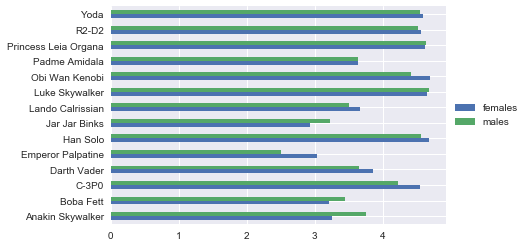

In [114]:
male_char = char_fave(males)

female_char = char_fave(females)

dfchar_gender = pd.DataFrame({'females': female_char,'males': male_char})
dfchar_gender.plot.barh()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

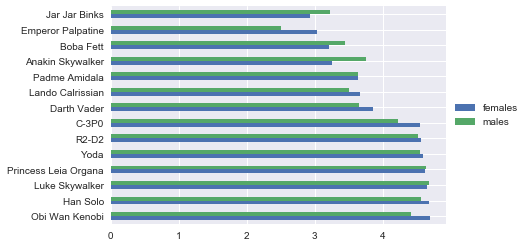

In [115]:
dfchar_gender = dfchar_gender.sort_values(by=['females'], ascending = False)
dfchar_gender.plot.barh()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

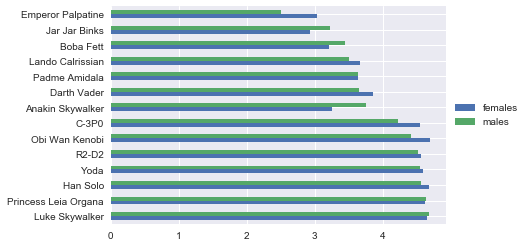

In [116]:
dfchar_gender = dfchar_gender.sort_values(by=['males'], ascending = False)
dfchar_gender.plot.barh()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))